## CA Project - K-nearest neighbur

##### Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

##### Reading data

In [2]:
# read in data from sample file
df = pd.read_csv('water_potability_edited.csv')
df.head() # show the first five rows

,ph,Hardness,Solids,Turbidity,Potability
0,NaN,204.890456,20791.31898,2.963135,0
1,3.716080,129.422921,18630.05786,4.500656,0
2,8.099124,224.236259,19909.54173,3.055934,0
3,8.316766,214.373394,22018.41744,4.628771,0
4,9.092223,181.101509,17978.98634,4.075075,0


##### Making a copy of the dataframe and categorising by their potability

In [3]:
# df['Potability'] = df.target

# make a copy of the dataframe
df_cat = df
# categorize by their potability
df_cat.loc[df['Potability'] == 0, 'Potability' ] = 0
df_cat.loc[df['Potability'] == 1, 'Potability' ] = 1

df_cat.head()

,ph,Hardness,Solids,Turbidity,Potability
0,NaN,204.890456,20791.31898,2.963135,0
1,3.716080,129.422921,18630.05786,4.500656,0
2,8.099124,224.236259,19909.54173,3.055934,0
3,8.316766,214.373394,22018.41744,4.628771,0
4,9.092223,181.101509,17978.98634,4.075075,0


##### Visualise the data

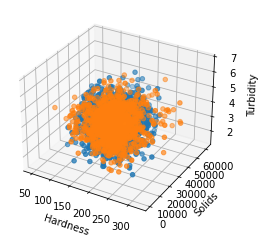

In [4]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# fig, ax = plt.subplots(figsize = (10,10))
df_zero = df_cat.loc[df['Potability'] == 0]
df_one = df_cat.loc[df['Potability'] == 1]
ax.scatter(df_zero['Hardness'], df_zero['Solids'],df_zero['Turbidity'])
ax.scatter(df_one['Hardness'], df_one['Solids'],df_one['Turbidity'])

ax.set_xlabel('Hardness')
ax.set_ylabel('Solids')
ax.set_zlabel('Turbidity')
#plt.ylim(4, 7)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = df_cat.iloc[:, 1:4]
y = df_cat['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 300)

In [6]:
X_train.head()
y_train

1701    0
3172    1
2516    0
3144    1
2755    1
       ..
3050    0
1738    0
2965    0
2529    0
1233    0
Name: Potability, Length: 2457, dtype: int64

#### Training the model (n_neighbours = 5)

In [7]:
# import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# we choose k = 3 here, due to the small number of data we have
# there isn't a k suitable for all. Generally we want to choose a small odd number.
# large k is generally more costy
knn_model = KNeighborsClassifier(n_neighbors = 5) 

knn_model.fit(X_train, y_train) # train our model to the data set we have. The training set is all the data points

KNeighborsClassifier()

##### Evaluate the model

In [8]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [9]:
y_test

2077    0
173     0
1919    1
2       0
2306    1
       ..
2910    0
1439    0
1051    0
1019    0
2447    1
Name: Potability, Length: 819, dtype: int64

In [10]:
accuracy_score(y_test, y_pred)

0.5567765567765568

##### Trial and error the k number (n_neighbours = 101)

In [11]:
knn_model = KNeighborsClassifier(n_neighbors = 101) 
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_pred

y_test

2077    0
173     0
1919    1
2       0
2306    1
       ..
2910    0
1439    0
1051    0
1019    0
2447    1
Name: Potability, Length: 819, dtype: int64

In [12]:
accuracy_score(y_test, y_pred)

0.6141636141636142

##### Trial and error the k number (n_neighbours = 501)
Increasing k number by 20 times, increases accuracy by 10%

In [13]:
knn_model = KNeighborsClassifier(n_neighbors = 501) 
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_pred

y_test

2077    0
173     0
1919    1
2       0
2306    1
       ..
2910    0
1439    0
1051    0
1019    0
2447    1
Name: Potability, Length: 819, dtype: int64

In [14]:
accuracy_score(y_test, y_pred)

0.612942612942613

##### Trial and error the k number (n_neighbours = 99)
A small k number or too big a k number lowers accuracy score. 101 appears to be a peak/plateau.

In [15]:
knn_model = KNeighborsClassifier(n_neighbors = 99) 
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_pred

y_test

accuracy_score(y_test, y_pred)

0.6141636141636142

##### Trial and error the k number (n_neighbours = 97)
A small k number or too big a k number lowers accuracy score. 101 appears to be a peak/plateau. When 97 is selected, it appears to lower the accuracy score.

In [16]:
#knn_model = KNeighborsClassifier(n_neighbors = 97) 
#knn_model.fit(X_train, y_train)

#y_pred = knn_model.predict(X_test)
#y_pred

#y_test

#accuracy_score(y_test, y_pred)

##### Trial and error the k number (n_neighbours = 103)
A small k number or too big a k number lowers accuracy score. 101 appears to be a peak/plateau. When 103 is selected, it also appears to lower the accuracy score.

In [41]:
knn_model = KNeighborsClassifier(n_neighbors = 103) 
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
y_pred

y_test

accuracy_score(y_test, y_pred)

0.6117216117216118

This hence suggests that the optimum k number plateaus at 99 to 101. As such, we select 99 to be the k number.

#### Predicting some value

In [18]:
knn_model.predict([(241.7244527, 9094.3133, 1.917754393)])

C:\Users\Nina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### Conclusion

Our accuracy score got from finding the suitable k is around 0.6